<a href="https://colab.research.google.com/github/kartikaya924/Student-Performance-Prediction-using-Data-Mining-Techniques/blob/main/majorProjectTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contains SVM, KNN, DT and RF classification methods

## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

### Uploading Dataset

In [ ]:
newData=pd.read_csv('mainData.csv')

In [ ]:
newData

,Gender,Level/Year,Age,Your cumulative average (GPA),Before COVID-19: Which of the following digital tools do you usually use?,After COVID-19: Which of the following digital tools do you usually use?,Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.","After COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",Before COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,After COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,"The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.","Prolonged use of digital tools (mobile, laptop, i-pad) causes students’ isolation",University learning contributes to strengthening the social personality of students.,Staying home for long periods of time leads to lethargy and laziness.,"Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.",The psychological element is a key factor in the success of the educational process.,"Some students cannot afford buying all necessary digital tools, which is embarrassing and frustrating.",I don’t recommend continuing with the online learning model because it is socially and psychologically unhealthy.,"Measures of lockdown, closures, and quarantine, brought by COVID-19 caused stress, frustration, and depression.","The volume of assignments via e-learning led to confusion, frustration and poor performance.",Face-to-face interaction contributes significantly to boosting students’ academic achievement.,Taking quizzes and exams online from home was not comfortable and made me nervous.
0,Female,Second/ Sophomore,18-24,80-89 / 3-3.49,Mobile phone,Laptop,6-9,9-12,Uncertain,Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree,Agree,Strongly Agree,Agree\t,Agree\t,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Agree,Strongly Agree
1,Male,Other,+30,+90 / +3.5,Laptop,Laptop,1-3,3-6,Agree,Strongly Agree,Disagree,Disagree,Agree,Disagree,Uncertain,Agree,Disagree,Disagree,Agree\t,Uncertain\t,Disagree,Uncertain\t,Disagree,Strongly Agree,Agree,Disagree,Uncertain,Disagree,Uncertain,Disagree
2,Female,First/Freshman,18-24,+90 / +3.5,Other,Mobile phone,1-3,3-6,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,Male,Second/ Sophomore,18-24,70-79 / 2.5-299,Laptop,Laptop,6-9,1-3,Uncertain,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Uncertain\t,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Uncertain,Agree,Strongly Agree,Agree,Uncertain
4,Male,Third/Junior,18-24,70-79 / 2.5-299,Laptop,Laptop,1-3,1-3,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Agree\t,Disagree,Strongly Agree,Uncertain\t,Disagree,Agree,Agree,Disagree,Disagree,Agree,Strongly Agree,Disagree
...,...,...,...,...,..

In [ ]:
newData=newData.dropna(axis=0) ###Droping null values

In [ ]:
pip install category_encoders  ###Installing dependecies 

In [ ]:
newData['Your cumulative average (GPA)'].unique()  ###Target Value

array(['80-89 / 3-3.49', '+90 / +3.5', '70-79 / 2.5-299', '60-69 / 2-2.9',
       '60-69 / 2-2.49', 'Below 60 / Below 2.0', '60-69', '80-89', '+90',
       '70-79', 'Below 60'], dtype=object)

In [ ]:

# sns.heatmap(newData.isnull(), cbar=False) ###Check for null values

##Correaltion Heatmap

In [ ]:
# sns.set(style="white")
# # Create a covariance matrix
# corr = newData.corr()
# # Creating a mask the size of our covariance matrix
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(40,40))
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220,10,as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
#             linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
# # ax.set_title('Multi-Collinearity of Features')
# # plt.savefig('correlation2.png')





## Encoding Values

In [ ]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['Your cumulative average (GPA)'],return_df=True,
                           mapping=[{'col':'Your cumulative average (GPA)',
'mapping':{'Below 60 / Below 2.0':0,'60-69 / 2-2.49':1,'60-69 / 2-2.9':1, '70-79 / 2.5-299':2, '80-89 / 3-3.49':3,'+90 / +3.5':4, '60-69':1, '80-89':3, '+90':4,
       '70-79':2, 'Below 60':0}}])

In [ ]:
newData=encoder.fit_transform(newData)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
newData['Male']=newData['Gender'].map({'Male':1, 'Female':0})

In [ ]:
newData=newData.drop(['Gender'], axis=1)

In [ ]:
tikna={'Fourth':'Fourth/Senior', 'Third':'Third/Junior', 'Second':'Second/ Sophomore', 'First':'First/Freshman'}
newData=newData.replace(tikna)

In [ ]:
dummy=pd.get_dummies(data=newData['Level/Year'])

In [ ]:
newData=pd.concat([newData, dummy], axis=1)

In [ ]:
newData=newData.drop(['Level/Year'], axis=1)

In [ ]:
# newData.head(1)
newData['Age'].unique()

array(['18-24', '+30', '25-30'], dtype=object)

In [ ]:
ageDummy=pd.get_dummies(data=newData['Age'])

In [ ]:
newData=pd.concat([newData, ageDummy], axis=1)

In [ ]:
newData=newData.drop(['Age'], axis=1)

In [ ]:
toolBeforeDummy=pd.get_dummies(data=newData['Before COVID-19: Which of the following digital tools do you usually use?'], prefix='before')

In [ ]:
newData=pd.concat([newData, toolBeforeDummy], axis=1)

In [ ]:
newData=newData.drop('Before COVID-19: Which of the following digital tools do you usually use?', axis=1)

In [ ]:
newData['Before COVID-19: How much time do you spend using the digital tools in learning?'].unique()

array(['6-9', '1-3 ', '3-6', '9-12', '+12', '1-3'], dtype=object)

In [ ]:
afterDummy=pd.get_dummies(data=newData['After COVID-19: Which of the following digital tools do you usually use?'], prefix='after')

In [ ]:
newData=pd.concat([newData, afterDummy], axis=1)

In [ ]:
newData=newData.drop(['After COVID-19: Which of the following digital tools do you usually use?'], axis=1)

In [ ]:
newData

,Your cumulative average (GPA),Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.","After COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",Before COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,After COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,"The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.","Prolonged use of digital tools (mobile, laptop, i-pad) causes students’ isolation",University learning contributes to strengthening the social personality of students.,Staying home for long periods of time leads to lethargy and laziness.,"Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.",The psychological element is a key factor in the success of the educational process.,"Some students cannot afford buying all necessary digital tools, which is embarrassing and frustrating.",I don’t recommend continuing with the online learning model because it is socially and psychologically unhealthy.,"Measures of lockdown, closures, and quarantine, brought by COVID-19 caused stress, frustration, and depression.","The volume of assignments via e-learning led to confusion, frustration and poor performance.",Face-to-face interaction contributes significantly to boosting students’ academic achievement.,Taking quizzes and exams online from home was not comfortable and made me nervous.,Male,First/Freshman,Fourth/Senior,Other,Second/ Sophomore,Third/Junior,+30,18-24,25-30,before_I pad/ Tablet,before_Laptop,before_Mobile Phone,before_Mobile phone,before_Other,before_Personal Computer,after_I pad/ Tablet,after_Laptop,after_Mobile Phone,after_Mobile phone,after_Other,after_Personal Computer
0,3,6-9,9-12,Uncertain,Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree,Agree,Strongly Agree,Agree\t,Agree\t,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Agree,Strongly Agree,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,4,1-3,3-6,Agree,Strongly Agree,Disagree,Disagree,Agree,Disagree,Uncertain,Agree,Disagree,Disagree,Agree\t,Uncertain\t,Disagree,Uncertain\t,Disagree,Strongly Agree,Agree,Disagree,Uncertain,Disagree,Uncertain,Disagree,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,4,1-3,3-6,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2,6-9,1-3,Uncertain,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Uncertain\t,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Uncertain,Agree,Strongly Agree,Agree,Uncertain,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2,1-3,1-3,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Agree\t,Disagree,Strongly Agree,Uncertain\t,Disagree,Agree,Agree,Disagree,Disagree,Agree,Strongl

In [ ]:
newData['Before COVID-19: How much time do you spend using the digital tools in learning?'].unique()

array(['6-9', '1-3 ', '3-6', '9-12', '+12', '1-3'], dtype=object)

In [ ]:

newData['The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.'].unique()

array(['Agree\t', 'Strongly Agree', 'Uncertain\t', 'Strongly Disagree',
       'Disagree', 'Agree', 'Uncertain'], dtype=object)

In [ ]:

newData['Before COVID-19: How much time do you spend using the digital tools in learning?'].unique()

array(['6-9', '1-3 ', '3-6', '9-12', '+12', '1-3'], dtype=object)

In [ ]:
newData['Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.'].unique()

array(['Agree', 'Disagree', 'Strongly Agree', 'Uncertain',
       'Strongly agree'], dtype=object)

In [ ]:
inigma={'Strongly Disagree':0, 'Disagree':1, 'Uncertain\t':2, 'Agree\t':3, 'Strongly Agree':4, 'Agree':3, 'Uncertain':2, 'Strongly agree':4,'Strongly disagree':0 }
fugma={'3-6':1, '6-9':2, '9-12':3, '+12':4, '1-3':0, '1-3 ':0}

In [ ]:
newData=newData.replace(inigma)

In [ ]:
newData=newData.replace(fugma)

In [ ]:
newData=newData.dropna(axis=0)

In [ ]:
newData.head()

,Your cumulative average (GPA),Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.","After COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",Before COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,After COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,"The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.","Prolonged use of digital tools (mobile, laptop, i-pad) causes students’ isolation",University learning contributes to strengthening the social personality of students.,Staying home for long periods of time leads to lethargy and laziness.,"Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.",The psychological element is a key factor in the success of the educational process.,"Some students cannot afford buying all necessary digital tools, which is embarrassing and frustrating.",I don’t recommend continuing with the online learning model because it is socially and psychologically unhealthy.,"Measures of lockdown, closures, and quarantine, brought by COVID-19 caused stress, frustration, and depression.","The volume of assignments via e-learning led to confusion, frustration and poor performance.",Face-to-face interaction contributes significantly to boosting students’ academic achievement.,Taking quizzes and exams online from home was not comfortable and made me nervous.,Male,First/Freshman,Fourth/Senior,Other,Second/ Sophomore,Third/Junior,+30,18-24,25-30,before_I pad/ Tablet,before_Laptop,before_Mobile Phone,before_Mobile phone,before_Other,before_Personal Computer,after_I pad/ Tablet,after_Laptop,after_Mobile Phone,after_Mobile phone,after_Other,after_Personal Computer
0,3,2,3,2,3,4,4,3,1,3,3,3,4,3,3,4,4,3,4,4,3,3,4,3,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,4,0,1,3,4,1,1,3,1,2,3,1,1,3,2,1,2,1,4,3,1,2,1,2,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,4,0,1,1,4,4,4,4,0,0,4,1,4,4,4,4,4,4,4,4,4,4,4,4,4,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2,2,0,2,4,3,4,4,3,4,4,4,3,4,4,2,0,4,3,4,2,3,4,3,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2,0,0,3,3,1,1,1,1,1,1,1,1,3,1,4,2,1,3,3,1,1,3,4,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
test1=newData

##Data Analysis

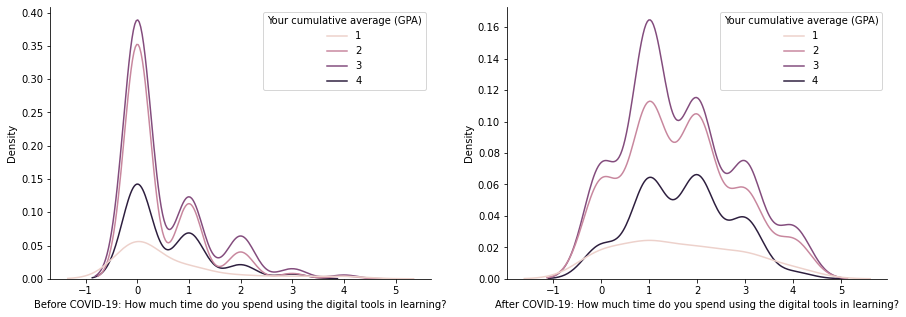

In [ ]:
fig = plt.figure(figsize=[15,5])
plt.tight_layout()
for i in range(2):
    fig.add_subplot(1,  2, i+1)
    sns.kdeplot(data=testData,x=testData.columns[i+1],hue='Your cumulative average (GPA)')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()

In [ ]:
plt.figure(figsize=(10,10))
gplot=sns.countplot(data=testData, x='Your cumulative average (GPA)')
for p in gplot.patches:
    gplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Dropping certain columns

In [ ]:
newData=newData.drop(['after_Laptop', 'Third/Junior'], axis=1) ## Based on the correaltion coefficients. Closer the value to 0, lesser effect it is having on the target value. This is done is order to prevent overfitting.

In [ ]:
newData=newData.dropna(axis=0)  ##Dropping null values again

In [ ]:
# newData

##Corelation Cofficient Values 

In [ ]:
newDataCorr=newData.corr()

In [ ]:
newDataCorr.nlargest(10, ['Your cumulative average (GPA)']) ##10 Largest values (can change number)

In [ ]:
newDataCorr.nsmallest(20, ['Your cumulative average (GPA)']) ##20 smallest values (can change number)

# Data Mining 

In [ ]:
pip install -U imbalanced-learn ##Installing dependency for SMOTE

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
import imblearn
print(imblearn.__version__) #Import Library and check version

0.8.0


###Test & Train Data

In [ ]:
testData=newData[newData['Your cumulative average (GPA)']>0] ##Removing CGPA scores of the less than 60 or '0' as there are only 4 rows

In [ ]:
testData

In [ ]:
X=testData.iloc[:, 1:]
y=testData.iloc[:, [0]] #Dividing the datset into parameters columns (X) and target value (y)

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y) ##Applying SMOTE to get rid of class imbalance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True) ##Train test split
# cv = KFold(n_splits=10, random_state=1, shuffle=True)

## Classification methods

##SVM

In [ ]:
from sklearn.svm import SVC
model=SVC()
ovo = OneVsOneClassifier(model) ##Used for multiclass classification
# ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OneVsOneClassifier(estimator=SVC())

In [ ]:
prd=ovo.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(prd, y_test))

[[141  41  31  32]
 [ 22  85  42  27]
 [ 25  58  96  29]
 [ 20  25  25  93]]


In [ ]:
print(classification_report(prd,y_test)) ## May come diffrent on your device, depending on sklearn version or inbuilt random number that model assigns to training set

              precision    recall  f1-score   support

           1       0.68      0.58      0.62       245
           2       0.41      0.48      0.44       176
           3       0.49      0.46      0.48       208
           4       0.51      0.57      0.54       163

    accuracy                           0.52       792
   macro avg       0.52      0.52      0.52       792
weighted avg       0.54      0.52      0.53       792



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
# dtree.fit(X_train, y_train)
ovo = OneVsOneClassifier(model)
# ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OneVsOneClassifier(estimator=SVC())

In [ ]:
pred=ovo.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.58      0.68      0.62       208
           2       0.48      0.41      0.44       209
           3       0.46      0.49      0.48       194
           4       0.57      0.51      0.54       181

    accuracy                           0.52       792
   macro avg       0.52      0.52      0.52       792
weighted avg       0.52      0.52      0.52       792



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=200) # Can change value 
# rd.fit(X_train, y_train)
# rd_pred=rd.predict(X_test)
ovo = OneVsOneClassifier(model)
# ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)
rd_pred=ovo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
print(classification_report(rd_pred, y_test))

              precision    recall  f1-score   support

           1       0.68      0.58      0.62       245
           2       0.41      0.48      0.44       176
           3       0.49      0.46      0.48       208
           4       0.51      0.57      0.54       163

    accuracy                           0.52       792
   macro avg       0.52      0.52      0.52       792
weighted avg       0.54      0.52      0.53       792



##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)

In [ ]:
# neigh.fit(X_train, y_train)
ovo = OneVsOneClassifier(neigh)
# ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=15))

In [ ]:
y_pred=ovo.predict(X_test)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.91      0.62      0.74       306
           2       0.48      0.65      0.55       155
           3       0.43      0.68      0.53       124
           4       0.75      0.66      0.70       207

    accuracy                           0.64       792
   macro avg       0.64      0.65      0.63       792
weighted avg       0.71      0.64      0.66       792

